In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import numpy as np
import math
# plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"]
plt.rcParams["font.size"] = 16

In [2]:
# gravity
t_grav_load_start = 50
t_grav_load_max = 50.0

# surface tension
t_st_load_max = 50.0
t_st_load_decay_start = 150.0
t_st_load_decay_factor = 0.005

In [3]:
def timeScaleGravity(t: float, t_load_start: float, t_load_max: float) -> float:
    """
    Computes a scaling factor between 0.0 and 1.0, starting to load after t_load_start 
    and reaching full scale (1.0) when the difference t - t_load_start equals t_load_max.
    
    The function returns:
        max(0.0, min(t_load_max, t - t_load_start) / t_load_max)
    """
    return max(0.0, min(t_load_max, t - t_load_start) / t_load_max)


def timeScaleSurfaceTension(t: float, t_load_max: float, 
                            t_load_decay_start: float, t_load_decay_factor: float) -> float:
    """
    Computes a scaling factor between 0.0 and 1.0 that transitions through three phases:
      1. For t < t_load_max: increases linearly from 0 to 1.
      2. For t_load_max <= t < t_load_decay_start: remains constant at 1.
      3. For t >= t_load_decay_start: decays exponentially with rate t_load_decay_factor.
      
    For the decay phase the function returns:
        exp(-t_load_decay_factor * (t - t_load_decay_start))
    """
    if t < t_load_max:
        return t / t_load_max
    elif t < t_load_decay_start:
        return 1.0
    else:
        return math.exp(-t_load_decay_factor * (t - t_load_decay_start))

In [4]:
t_A = 150.0
t_B = 314.0
t_C = 450.0
t_D = 510.0

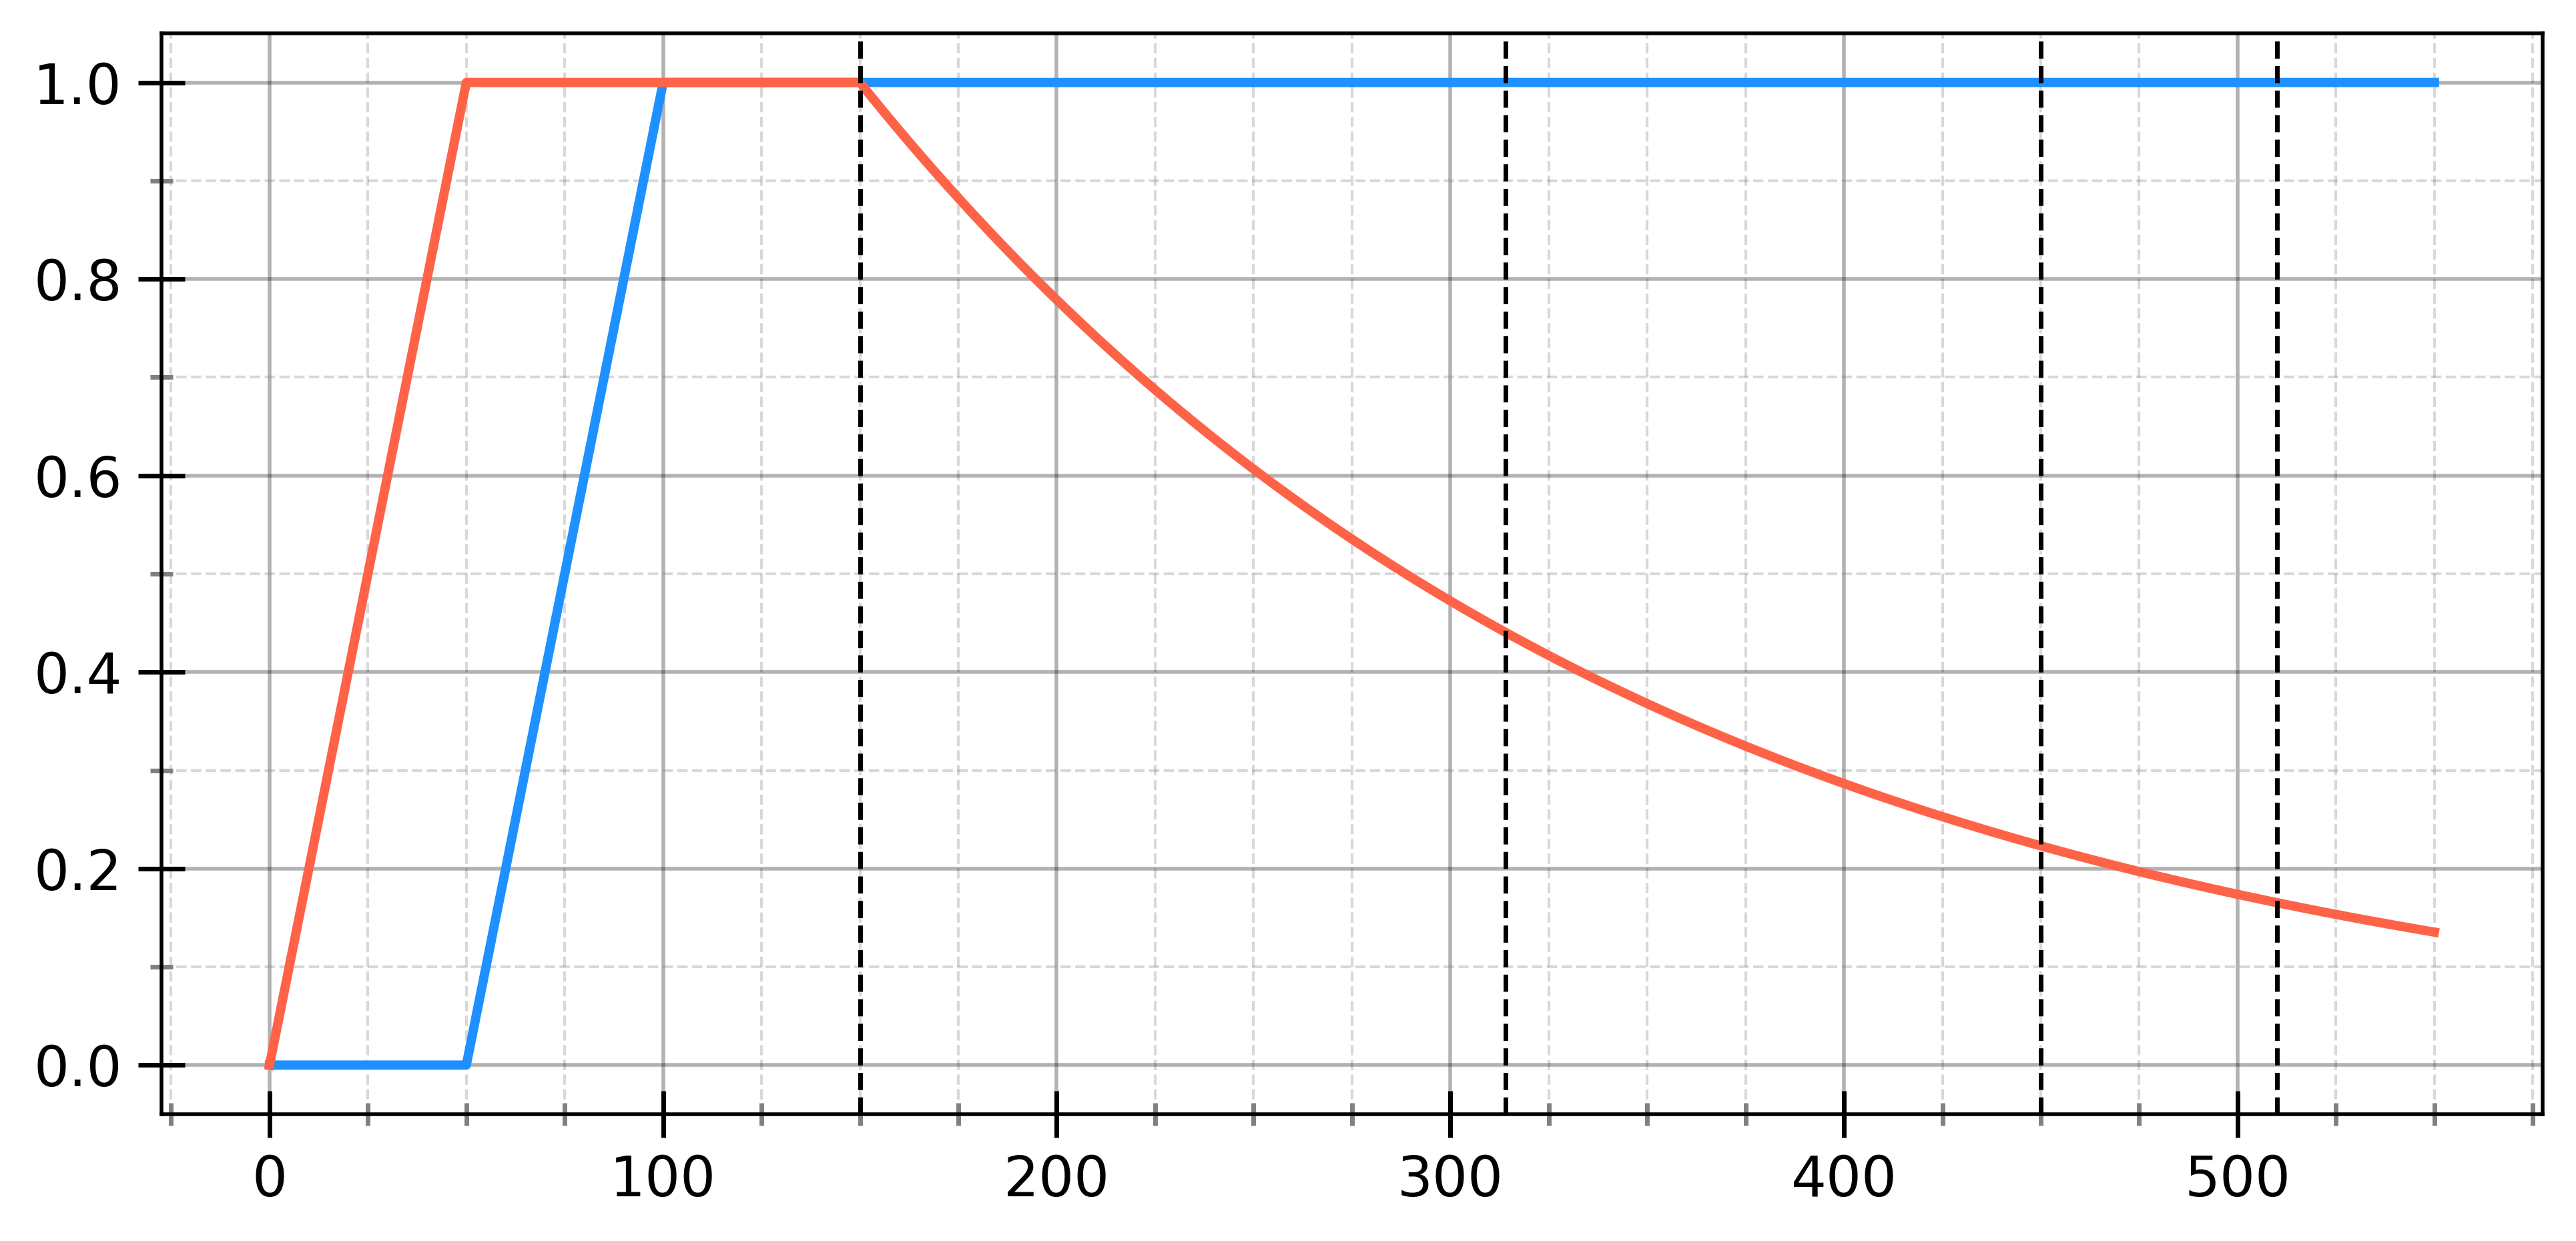

In [5]:
# Generate a range of t values as a NumPy array
t_values = np.linspace(0, 550, 10000)

# Compute the function values using the vectorized implementations
gravity_values = [timeScaleGravity(t, t_grav_load_start, t_grav_load_max) for t in t_values]
surface_tension_values = [
    timeScaleSurfaceTension(t, t_st_load_max, t_st_load_decay_start, t_st_load_decay_factor)
    for t in t_values
]

# Plotting the results
fig, ax = plt.subplots(figsize=(8, 4),dpi=500)
ax.plot(t_values, gravity_values, label='Time Scale Gravity', linewidth=2, color="dodgerblue")
ax.plot(t_values, surface_tension_values, label='Time Scale Surface Tension', linewidth=2, color="tomato")

# Add vertical dashed lines for t_A, t_B, t_C, and t_D
for t_val in [t_A, t_B, t_C, t_D]:
    ax.axvline(x=t_val, color='black', linestyle='--', linewidth=1)

# Annotate the vertical lines with labels A, B, C, and D. Place text at 95% of the y-axis height.
# y_max = plt.ylim()[1]
# plt.text(t_A, y_max * 0.95, 'A', horizontalalignment='center', verticalalignment='top', fontsize=12)
# plt.text(t_B, y_max * 0.95, 'B', horizontalalignment='center', verticalalignment='top', fontsize=12)
# plt.text(t_C, y_max * 0.95, 'C', horizontalalignment='center', verticalalignment='top', fontsize=12)
# plt.text(t_D, y_max * 0.95, 'D', horizontalalignment='center', verticalalignment='top', fontsize=12)

# plt.xlabel('Time (t)', fontsize=14)
# plt.ylabel('Scale Factor', fontsize=14)
# plt.legend(fontsize=12)

# Customize major and minor ticks for the x-axis
ax.xaxis.set_major_locator(ticker.MultipleLocator(100))  # Major ticks every 100 units.
ax.xaxis.set_minor_locator(ticker.MultipleLocator(25))     # Minor ticks every 25 units.

# Customize major and minor ticks for the y-axis
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.2))    # Major ticks every 0.2 units.
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))   # Minor ticks every 0.05 units.

# Modify tick parameters: direction, length, width, and color for both major and minor ticks.
ax.tick_params(axis='both', which='major', direction='inout', length=10, width=1, colors='black')
ax.tick_params(axis='both', which='minor', direction='inout', length=5, width=1, colors='gray')

# Enable grid lines for both major and minor ticks, with distinct line styles if desired.
ax.grid(which='major', linestyle='-', linewidth=0.8, color='black', alpha=0.3)
ax.grid(which='minor', linestyle='--', linewidth=0.6, color='gray', alpha=0.3)

for label in ax.get_xticklabels():
    # label.set_fontname('TimesNewRoman')
    label.set_fontsize(12)
for label in ax.get_yticklabels():
    # label.set_fontname('Times New Roman')
    label.set_fontsize(12)
ax.grid(True)
plt.tight_layout()
plt.savefig("../../ex3_timescale_graph.svg")
plt.show()